# **Assignment-3: Logistic Regression, NCC, KNN, Perceptron**

### **1. Logistic Regression (scratch): Implement batch gradient descent for binary logistic regression; plot loss curve. Also run sklearn LogisticRegression and compare.**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [24]:
X, y = make_classification(n_samples=2000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Mathematical Implementation (From Scratch)**

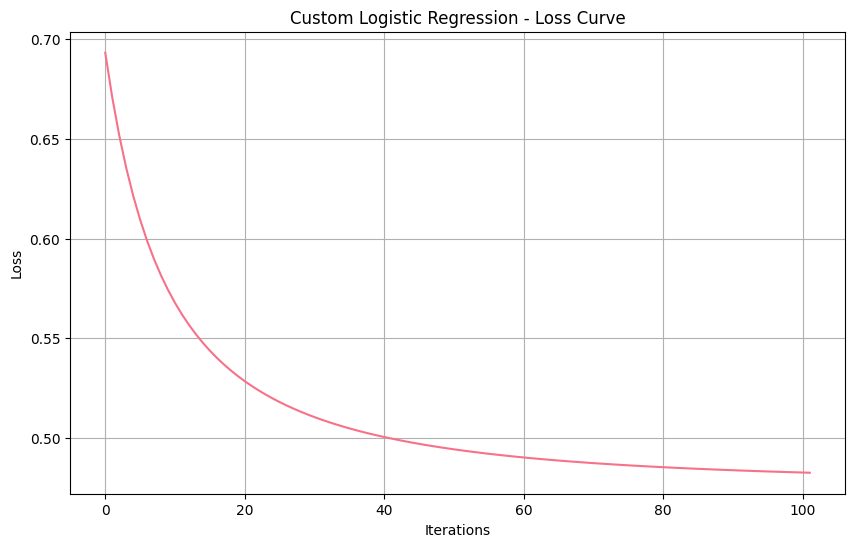

Custom Logistic Regression Results:
Final Loss: 0.4826
Accuracy: 0.7675
Precision: 0.7477
Recall: 0.8040
F1-Score: 0.7748


In [25]:

class BinaryLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iters=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.tol = tol
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """Batch gradient descent implementation"""
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        X_with_intercept = np.column_stack([np.ones(n_samples), X])

        for i in range(self.max_iters):
            linear_model = np.dot(X_with_intercept, np.append(self.bias, self.weights))

            y_pred = self.sigmoid(linear_model)

            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

            if i > 0 and abs(self.loss_history[-2] - loss) < self.tol:
                break

            dw = (1/n_samples) * np.dot(X_with_intercept.T, (y_pred - y))

            self.bias -= self.learning_rate * dw[0]
            self.weights -= self.learning_rate * dw[1:]

    def predict_proba(self, X):
        """Predict probabilities"""
        n_samples = X.shape[0]
        X_with_intercept = np.column_stack([np.ones(n_samples), X])
        linear_model = np.dot(X_with_intercept, np.append(self.bias, self.weights))
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """Pgivenredict class labels"""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

custom_lr = BinaryLogisticRegression(learning_rate=0.1, max_iters=1000)

start_time = time.time()
custom_lr.fit(X_train, y_train)
custom_train_time = time.time() - start_time

start_time = time.time()
y_pred_custom = custom_lr.predict(X_test)
custom_test_time = time.time() - start_time

custom_accuracy = accuracy_score(y_test, y_pred_custom)
custom_precision = precision_score(y_test, y_pred_custom)
custom_recall = recall_score(y_test, y_pred_custom)
custom_f1 = f1_score(y_test, y_pred_custom)

plt.figure(figsize=(10, 6))
plt.plot(custom_lr.loss_history)
plt.title('Custom Logistic Regression - Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

print("Custom Logistic Regression Results:")
print(f"Final Loss: {custom_lr.loss_history[-1]:.4f}")
print(f"Accuracy: {custom_accuracy:.4f}")
print(f"Precision: {custom_precision:.4f}")
print(f"Recall: {custom_recall:.4f}")
print(f"F1-Score: {custom_f1:.4f}")

**Library Implementation (scikit-learn)**


COMPARISON RESULTS
                          Model  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Test Time (s)
     Custom Logistic Regression    0.7675   0.747664 0.804020  0.774818        0.014315       0.000199
Scikit-learn LogisticRegression    0.7800   0.748879 0.839196  0.791469        0.007538       0.000492

PERFORMANCE ANALYSIS
Accuracy Difference: 0.0125
Training Time Ratio (Custom/Sklearn): 1.90x
Testing Time Ratio (Custom/Sklearn): 0.40x


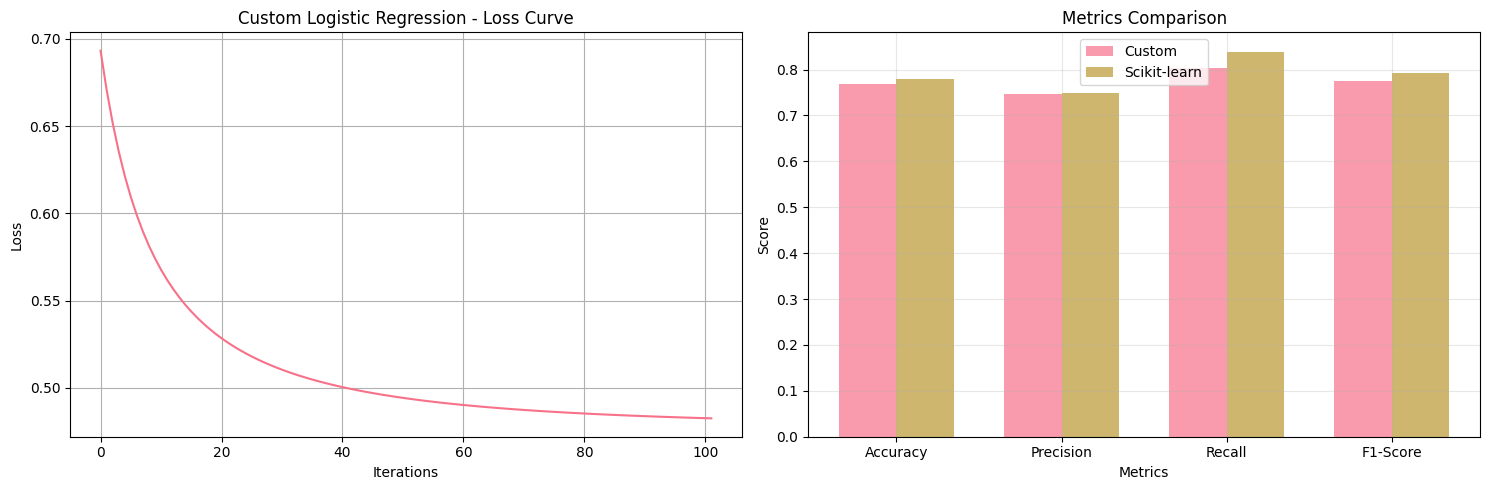

In [26]:
sklearn_lr = LogisticRegression(random_state=42, max_iter=1000)

start_time = time.time()
sklearn_lr.fit(X_train, y_train)
sklearn_train_time = time.time() - start_time

start_time = time.time()
y_pred_sklearn = sklearn_lr.predict(X_test)
sklearn_test_time = time.time() - start_time

sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
sklearn_precision = precision_score(y_test, y_pred_sklearn)
sklearn_recall = recall_score(y_test, y_pred_sklearn)
sklearn_f1 = f1_score(y_test, y_pred_sklearn)

comparison_data = {
    'Model': ['Custom Logistic Regression', 'Scikit-learn LogisticRegression'],
    'Accuracy': [custom_accuracy, sklearn_accuracy],
    'Precision': [custom_precision, sklearn_precision],
    'Recall': [custom_recall, sklearn_recall],
    'F1-Score': [custom_f1, sklearn_f1],
    'Train Time (s)': [custom_train_time, sklearn_train_time],
    'Test Time (s)': [custom_test_time, sklearn_test_time]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("COMPARISON RESULTS")
print("="*80)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("PERFORMANCE ANALYSIS")
print("="*80)
print(f"Accuracy Difference: {abs(custom_accuracy - sklearn_accuracy):.4f}")
print(f"Training Time Ratio (Custom/Sklearn): {custom_train_time/sklearn_train_time:.2f}x")
print(f"Testing Time Ratio (Custom/Sklearn): {custom_test_time/sklearn_test_time:.2f}x")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(custom_lr.loss_history)
axes[0].set_title('Custom Logistic Regression - Loss Curve')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
custom_metrics = [custom_accuracy, custom_precision, custom_recall, custom_f1]
sklearn_metrics = [sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_f1]

x = np.arange(len(metrics))
width = 0.35

axes[1].bar(x - width/2, custom_metrics, width, label='Custom', alpha=0.7)
axes[1].bar(x + width/2, sklearn_metrics, width, label='Scikit-learn', alpha=0.7)
axes[1].set_title('Metrics Comparison')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **2. Nearest Centroid Classifier (NCC): Compute class centroids, classify by nearest centroid (Euclidean); compare with sklearn.neighbors.NearestCentroid.**

**Mathematical Implementation**

In [27]:
class CustomNearestCentroid:
    def __init__(self, metric='euclidean'):
        self.metric = metric
        self.centroids = None
        self.classes = None
        self.n_features = None

    def _euclidean_distance(self, x1, x2):
        """Compute Euclidean distance between two vectors"""
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        """Compute Manhattan distance between two vectors"""
        return np.sum(np.abs(x1 - x2))

    def compute_distance(self, x1, x2):
        """Compute distance based on selected metric"""
        if self.metric == 'euclidean':
            return self._euclidean_distance(x1, x2)
        elif self.metric == 'manhattan':
            return self._manhattan_distance(x1, x2)
        else:
            raise ValueError("Unsupported metric. Use 'euclidean' or 'manhattan'")

    def fit(self, X, y):
        """Compute class centroids"""
        self.classes = np.unique(y)
        self.n_features = X.shape[1]
        self.centroids = {}

        for cls in self.classes:
            class_samples = X[y == cls]

            centroid = np.mean(class_samples, axis=0)
            self.centroids[cls] = centroid

            print(f"Class {cls} centroid: {centroid}")
            print(f"Class {cls} sample size: {len(class_samples)}")

    def predict(self, X):
        """Predict class labels based on nearest centroid"""
        predictions = []

        for sample in X:
            distances = []
            for cls, centroid in self.centroids.items():
                dist = self.compute_distance(sample, centroid)
                distances.append((dist, cls))

            min_distance_class = min(distances, key=lambda x: x[0])[1]
            predictions.append(min_distance_class)

        return np.array(predictions)

    def predict_proba(self, X):
        """Predict class probabilities based on inverse distances"""
        probabilities = []

        for sample in X:
            distances = []
            for cls, centroid in self.centroids.items():
                dist = self.compute_distance(sample, centroid)
                distances.append((dist, cls))

            total_inverse_distance = sum(1/(d[0] + 1e-8) for d in distances)
            prob_dict = {}

            for dist, cls in distances:
                prob = (1/(dist + 1e-8)) / total_inverse_distance
                prob_dict[cls] = prob

            class_probs = [prob_dict.get(cls, 0) for cls in self.classes]
            probabilities.append(class_probs)

        return np.array(probabilities)

    def get_centroids(self):
        """Return computed centroids"""
        return self.centroids

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

custom_ncc = CustomNearestCentroid(metric='euclidean')

start_time = time.time()
custom_ncc.fit(X_train, y_train)
custom_train_time = time.time() - start_time

start_time = time.time()
y_pred_custom = custom_ncc.predict(X_test)
custom_test_time = time.time() - start_time

y_proba_custom = custom_ncc.predict_proba(X_test)

custom_accuracy = accuracy_score(y_test, y_pred_custom)
custom_precision = precision_score(y_test, y_pred_custom, average='weighted')
custom_recall = recall_score(y_test, y_pred_custom, average='weighted')
custom_f1 = f1_score(y_test, y_pred_custom, average='weighted')

print("Custom Nearest Centroid Classifier Results:")
print(f"Accuracy: {custom_accuracy:.4f}")
print(f"Precision: {custom_precision:.4f}")
print(f"Recall: {custom_recall:.4f}")
print(f"F1-Score: {custom_f1:.4f}")
print(f"Training Time: {custom_train_time:.6f} seconds")
print(f"Testing Time: {custom_test_time:.6f} seconds")

centroids = custom_ncc.get_centroids()

Class 0 centroid: [ 0.00489553  0.03611293 -0.01650393 -0.04150145 -0.02302699 -0.38090735
 -0.03478794  0.34819245 -0.31287432  0.28378351]
Class 0 sample size: 699
Class 1 centroid: [-0.00482159 -0.00696844  0.01462288  0.00221436  0.02378162  0.37137492
  0.04194706 -0.33057191  0.30962449 -0.24702352]
Class 1 sample size: 701
Custom Nearest Centroid Classifier Results:
Accuracy: 0.7567
Precision: 0.7612
Recall: 0.7567
F1-Score: 0.7555
Training Time: 0.001176 seconds
Testing Time: 0.008822 seconds


**Library Implementation**

In [28]:
sklearn_ncc = NearestCentroid(metric='euclidean')

start_time = time.time()
sklearn_ncc.fit(X_train, y_train)
sklearn_train_time = time.time() - start_time

start_time = time.time()
y_pred_sklearn = sklearn_ncc.predict(X_test)
sklearn_test_time = time.time() - start_time

sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
sklearn_precision = precision_score(y_test, y_pred_sklearn, average='weighted')
sklearn_recall = recall_score(y_test, y_pred_sklearn, average='weighted')
sklearn_f1 = f1_score(y_test, y_pred_sklearn, average='weighted')

print("\nScikit-learn NearestCentroid Results:")
print(f"Accuracy: {sklearn_accuracy:.4f}")
print(f"Precision: {sklearn_precision:.4f}")
print(f"Recall: {sklearn_recall:.4f}")
print(f"F1-Score: {sklearn_f1:.4f}")
print(f"Training Time: {sklearn_train_time:.6f} seconds")
print(f"Testing Time: {sklearn_test_time:.6f} seconds")

comparison_data = {
    'Model': ['Custom NCC', 'Scikit-learn NCC'],
    'Accuracy': [custom_accuracy, sklearn_accuracy],
    'Precision': [custom_precision, sklearn_precision],
    'Recall': [custom_recall, sklearn_recall],
    'F1-Score': [custom_f1, sklearn_f1],
    'Train Time (s)': [custom_train_time, sklearn_train_time],
    'Test Time (s)': [custom_test_time, sklearn_test_time]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("COMPARISON RESULTS")
print("="*80)
print(comparison_df.to_string(index=False))


Scikit-learn NearestCentroid Results:
Accuracy: 0.7567
Precision: 0.7612
Recall: 0.7567
F1-Score: 0.7555
Training Time: 0.002661 seconds
Testing Time: 0.001923 seconds

COMPARISON RESULTS
           Model  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Test Time (s)
      Custom NCC  0.756667   0.761206 0.756667  0.755526        0.001176       0.008822
Scikit-learn NCC  0.756667   0.761206 0.756667  0.755526        0.002661       0.001923


### **3. k-Nearest Neighbors (k-NN): Implement k-NN (k={1,3,5,7,9}), test uniform/distance weighting; compare with sklearn.KNeighborsClassifier and plot accuracy vs k.**

**Mathematical Implementation**

In [29]:
class CustomKNN:
    def __init__(self, k=5, weights='uniform', metric='euclidean'):
        self.k = k
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def _euclidean_distance(self, x1, x2):
        """Compute Euclidean distance between two vectors"""
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        """Compute Manhattan distance between two vectors"""
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2, p=2):
        """Compute Minkowski distance between two vectors"""
        return np.sum(np.abs(x1 - x2) ** p) ** (1/p)

    def compute_distance(self, x1, x2):
        """Compute distance based on selected metric"""
        if self.metric == 'euclidean':
            return self._euclidean_distance(x1, x2)
        elif self.metric == 'manhattan':
            return self._manhattan_distance(x1, x2)
        elif self.metric == 'minkowski':
            return self._minkowski_distance(x1, x2)
        else:
            raise ValueError("Unsupported metric")

    def fit(self, X, y):
        """Store training data (lazy learner)"""
        self.X_train = X
        self.y_train = y
        print(f"Training data stored: {X.shape[0]} samples, {X.shape[1]} features")

    def predict_single(self, x):
        """Predict class for a single sample"""
        distances = []
        for i, train_sample in enumerate(self.X_train):
            dist = self.compute_distance(x, train_sample)
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]

        if self.weights == 'uniform':
            k_nearest_labels = [label for _, label in k_nearest]
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]

        elif self.weights == 'distance':
            class_weights = {}
            for dist, label in k_nearest:
                weight = 1 / (dist + 1e-8)
                if label in class_weights:
                    class_weights[label] += weight
                else:
                    class_weights[label] = weight

            return max(class_weights.items(), key=lambda x: x[1])[0]

    def predict(self, X):
        """Predict class labels for multiple samples"""
        predictions = []
        for i, sample in enumerate(X):
            if i % 100 == 0:
                print(f"Predicting sample {i}/{len(X)}")
            predictions.append(self.predict_single(sample))
        return np.array(predictions)

    def predict_proba(self, X):
        """Predict class probabilities"""
        probabilities = []
        for x in X:
            distances = []
            for i, train_sample in enumerate(self.X_train):
                dist = self.compute_distance(x, train_sample)
                distances.append((dist, self.y_train[i]))

            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]

            if self.weights == 'uniform':
                k_nearest_labels = [label for _, label in k_nearest]
                total = len(k_nearest_labels)
                class_counts = Counter(k_nearest_labels)
                prob_dict = {cls: count/total for cls, count in class_counts.items()}

            elif self.weights == 'distance':
                total_weight = 0
                class_weights = {}
                for dist, label in k_nearest:
                    weight = 1 / (dist + 1e-8)
                    total_weight += weight
                    if label in class_weights:
                        class_weights[label] += weight
                    else:
                        class_weights[label] = weight

                prob_dict = {cls: weight/total_weight for cls, weight in class_weights.items()}

            unique_classes = np.unique(self.y_train)
            prob_array = [prob_dict.get(cls, 0) for cls in unique_classes]
            probabilities.append(prob_array)

        return np.array(probabilities)

X, y = make_classification(n_samples=1000, n_features=4, n_redundant=0,
                          n_informative=4, n_clusters_per_class=1,
                          n_classes=3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                    random_state=42, stratify=y)

print("Dataset Information:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

k_values = [1, 3, 5, 7, 9]
weighting_schemes = ['uniform', 'distance']

results = []

print("\n" + "="*80)
print("CUSTOM KNN IMPLEMENTATION RESULTS")
print("="*80)

for weights in weighting_schemes:
    for k in k_values:
        print(f"\nTesting k={k}, weights='{weights}'")

        custom_knn = CustomKNN(k=k, weights=weights, metric='euclidean')

        start_time = time.time()
        custom_knn.fit(X_train, y_train)
        train_time = time.time() - start_time

        start_time = time.time()
        y_pred_custom = custom_knn.predict(X_test)
        test_time = time.time() - start_time

        accuracy = accuracy_score(y_test, y_pred_custom)
        precision = precision_score(y_test, y_pred_custom, average='weighted')
        recall = recall_score(y_test, y_pred_custom, average='weighted')
        f1 = f1_score(y_test, y_pred_custom, average='weighted')

        results.append({
            'Model': 'Custom KNN',
            'k': k,
            'Weights': weights,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Train Time (s)': train_time,
            'Test Time (s)': test_time
        })

        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
              f"Recall: {recall:.4f}, F1: {f1:.4f}")
        print(f"Train Time: {train_time:.4f}s, Test Time: {test_time:.4f}s")

Dataset Information:
Training samples: 700
Testing samples: 300
Number of features: 4
Number of classes: 3
Class distribution: [330 334 336]

CUSTOM KNN IMPLEMENTATION RESULTS

Testing k=1, weights='uniform'
Training data stored: 700 samples, 4 features
Predicting sample 0/300
Predicting sample 100/300
Predicting sample 200/300
Accuracy: 0.8900, Precision: 0.8910, Recall: 0.8900, F1: 0.8888
Train Time: 0.0000s, Test Time: 2.7559s

Testing k=3, weights='uniform'
Training data stored: 700 samples, 4 features
Predicting sample 0/300
Predicting sample 100/300
Predicting sample 200/300
Accuracy: 0.9167, Precision: 0.9181, Recall: 0.9167, F1: 0.9159
Train Time: 0.0000s, Test Time: 2.9312s

Testing k=5, weights='uniform'
Training data stored: 700 samples, 4 features
Predicting sample 0/300
Predicting sample 100/300
Predicting sample 200/300
Accuracy: 0.9200, Precision: 0.9209, Recall: 0.9200, F1: 0.9197
Train Time: 0.0000s, Test Time: 1.5715s

Testing k=7, weights='uniform'
Training data stor

**Library Implementation**

In [30]:
print("\n" + "="*80)
print("SCIKIT-LEARN KNN IMPLEMENTATION RESULTS")
print("="*80)

for weights in weighting_schemes:
    for k in k_values:
        print(f"\nTesting k={k}, weights='{weights}'")

        sklearn_knn = KNeighborsClassifier(n_neighbors=k, weights=weights, metric='euclidean')

        start_time = time.time()
        sklearn_knn.fit(X_train, y_train)
        train_time = time.time() - start_time

        start_time = time.time()
        y_pred_sklearn = sklearn_knn.predict(X_test)
        test_time = time.time() - start_time

        accuracy = accuracy_score(y_test, y_pred_sklearn)
        precision = precision_score(y_test, y_pred_sklearn, average='weighted')
        recall = recall_score(y_test, y_pred_sklearn, average='weighted')
        f1 = f1_score(y_test, y_pred_sklearn, average='weighted')

        results.append({
            'Model': 'Scikit-learn KNN',
            'k': k,
            'Weights': weights,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Train Time (s)': train_time,
            'Test Time (s)': test_time
        })

        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
              f"Recall: {recall:.4f}, F1: {f1:.4f}")
        print(f"Train Time: {train_time:.4f}s, Test Time: {test_time:.4f}s")

results_df = pd.DataFrame(results)


SCIKIT-LEARN KNN IMPLEMENTATION RESULTS

Testing k=1, weights='uniform'
Accuracy: 0.8900, Precision: 0.8910, Recall: 0.8900, F1: 0.8888
Train Time: 0.0032s, Test Time: 0.0028s

Testing k=3, weights='uniform'
Accuracy: 0.9167, Precision: 0.9187, Recall: 0.9167, F1: 0.9159
Train Time: 0.0010s, Test Time: 0.0025s

Testing k=5, weights='uniform'
Accuracy: 0.9167, Precision: 0.9176, Recall: 0.9167, F1: 0.9163
Train Time: 0.0010s, Test Time: 0.0026s

Testing k=7, weights='uniform'
Accuracy: 0.9100, Precision: 0.9121, Recall: 0.9100, F1: 0.9093
Train Time: 0.0010s, Test Time: 0.0028s

Testing k=9, weights='uniform'
Accuracy: 0.9000, Precision: 0.9012, Recall: 0.9000, F1: 0.8991
Train Time: 0.0010s, Test Time: 0.0030s

Testing k=1, weights='distance'
Accuracy: 0.8900, Precision: 0.8910, Recall: 0.8900, F1: 0.8888
Train Time: 0.0012s, Test Time: 0.0018s

Testing k=3, weights='distance'
Accuracy: 0.9167, Precision: 0.9181, Recall: 0.9167, F1: 0.9159
Train Time: 0.0010s, Test Time: 0.0020s

Test

**Visualization and Analysis**

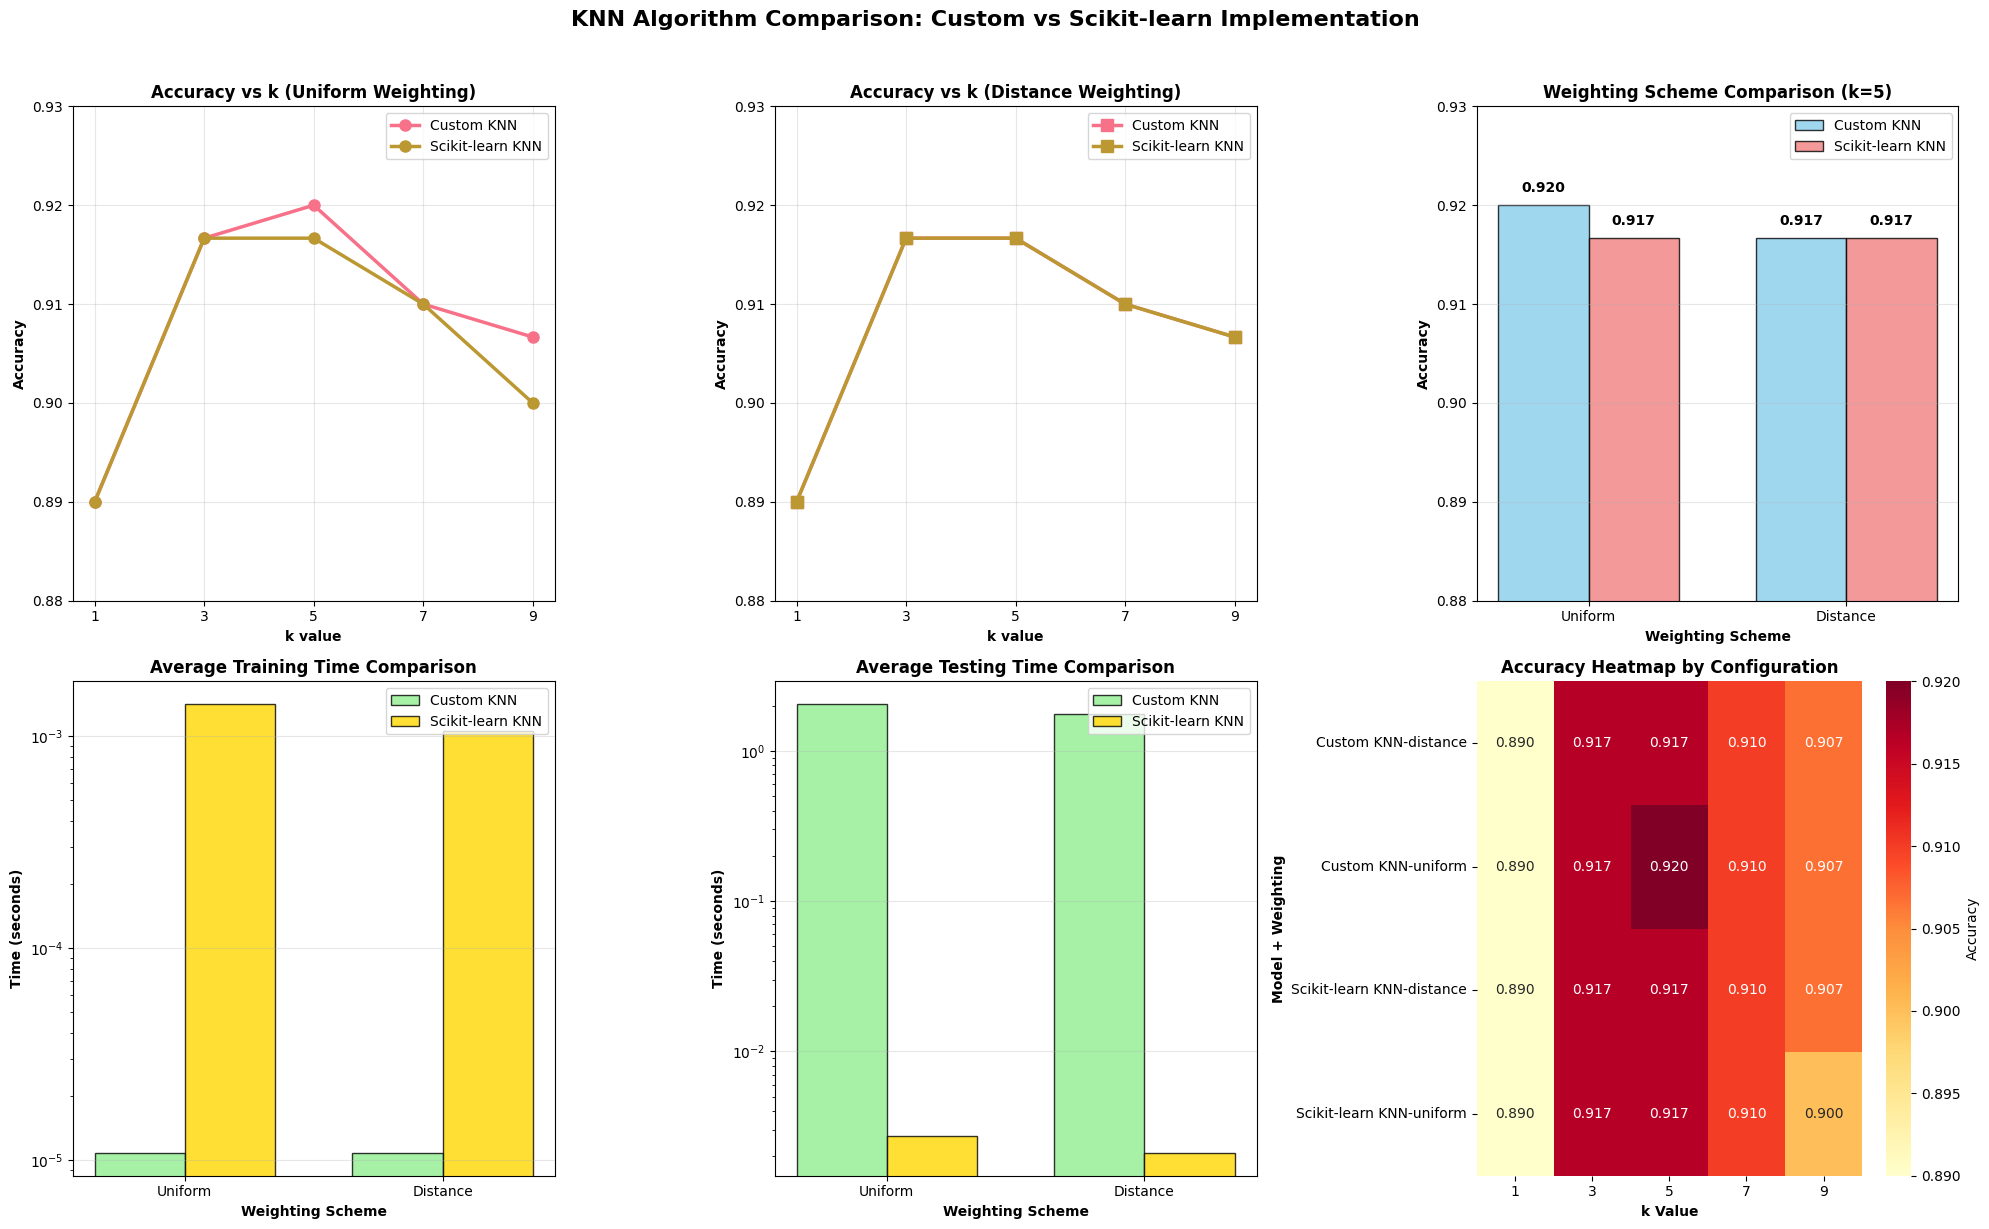


DETAILED COMPARISON RESULTS
           Model  k  Weights  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Test Time (s)
      Custom KNN  1  uniform  0.890000   0.891005 0.890000  0.888769        0.000009       2.755889
      Custom KNN  3  uniform  0.916667   0.918051 0.916667  0.915902        0.000013       2.931228
      Custom KNN  5  uniform  0.920000   0.920890 0.920000  0.919665        0.000011       1.571476
      Custom KNN  7  uniform  0.910000   0.910890 0.910000  0.909451        0.000010       1.513620
      Custom KNN  9  uniform  0.906667   0.907011 0.906667  0.905954        0.000011       1.494317
      Custom KNN  1 distance  0.890000   0.891005 0.890000  0.888769        0.000011       1.616207
      Custom KNN  3 distance  0.916667   0.918051 0.916667  0.915902        0.000010       1.869582
      Custom KNN  5 distance  0.916667   0.917790 0.916667  0.916226        0.000011       2.296987
      Custom KNN  7 distance  0.910000   0.910397 0.910000  0.909387   

In [31]:
def create_comprehensive_visualizations(results_df):
    """Create comprehensive visualizations for KNN comparison results"""

    plt.style.use('default')
    sns.set_palette("husl")

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('KNN Algorithm Comparison: Custom vs Scikit-learn Implementation',
                 fontsize=16, fontweight='bold', y=1.02)

    k_values = sorted(results_df['k'].unique())

    uniform_results = results_df[results_df['Weights'] == 'uniform']

    for model in ['Custom KNN', 'Scikit-learn KNN']:
        model_data = uniform_results[uniform_results['Model'] == model]
        if len(model_data) > 0:
            axes[0,0].plot(model_data['k'], model_data['Accuracy'],
                           marker='o', linewidth=2.5, label=model, markersize=8)

    axes[0,0].set_title('Accuracy vs k (Uniform Weighting)', fontsize=12, fontweight='bold')
    axes[0,0].set_xlabel('k value', fontweight='bold')
    axes[0,0].set_ylabel('Accuracy', fontweight='bold')
    axes[0,0].set_xticks(k_values)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_ylim(0.88, 0.93)

    distance_results = results_df[results_df['Weights'] == 'distance']

    for model in ['Custom KNN', 'Scikit-learn KNN']:
        model_data = distance_results[distance_results['Model'] == model]
        if len(model_data) > 0:
            axes[0,1].plot(model_data['k'], model_data['Accuracy'],
                           marker='s', linewidth=2.5, label=model, markersize=8)

    axes[0,1].set_title('Accuracy vs k (Distance Weighting)', fontsize=12, fontweight='bold')
    axes[0,1].set_xlabel('k value', fontweight='bold')
    axes[0,1].set_ylabel('Accuracy', fontweight='bold')
    axes[0,1].set_xticks(k_values)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].set_ylim(0.88, 0.93)

    best_k = results_df.loc[results_df['Accuracy'].idxmax(), 'k']

    try:
        k_results = results_df[results_df['k'] == best_k]

        x = np.arange(2)
        width = 0.35

        custom_acc = []
        sklearn_acc = []

        for weight_type in ['uniform', 'distance']:
            custom_data = k_results[(k_results['Model'] == 'Custom KNN') &
                                  (k_results['Weights'] == weight_type)]
            sklearn_data = k_results[(k_results['Model'] == 'Scikit-learn KNN') &
                                   (k_results['Weights'] == weight_type)]

            custom_acc.append(custom_data['Accuracy'].values[0] if len(custom_data) > 0 else 0)
            sklearn_acc.append(sklearn_data['Accuracy'].values[0] if len(sklearn_data) > 0 else 0)

        bars1 = axes[0,2].bar(x - width/2, custom_acc, width, label='Custom KNN',
                             alpha=0.8, color='skyblue', edgecolor='black')
        bars2 = axes[0,2].bar(x + width/2, sklearn_acc, width, label='Scikit-learn KNN',
                             alpha=0.8, color='lightcoral', edgecolor='black')

        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                              f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

        axes[0,2].set_title(f'Weighting Scheme Comparison (k={best_k})', fontsize=12, fontweight='bold')
        axes[0,2].set_xlabel('Weighting Scheme', fontweight='bold')
        axes[0,2].set_ylabel('Accuracy', fontweight='bold')
        axes[0,2].set_xticks(x)
        axes[0,2].set_xticklabels(['Uniform', 'Distance'])
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3, axis='y')
        axes[0,2].set_ylim(0.88, 0.93)

    except Exception as e:
        axes[0,2].text(0.5, 0.5, f'Error plotting:\n{str(e)}',
                      ha='center', va='center', transform=axes[0,2].transAxes)
        axes[0,2].set_title('Weighting Scheme Comparison', fontsize=12, fontweight='bold')

    try:
        train_times_uniform = uniform_results.groupby('Model')['Train Time (s)'].mean()
        train_times_distance = distance_results.groupby('Model')['Train Time (s)'].mean()

        x_time = np.arange(2)
        width = 0.35

        custom_train = [train_times_uniform.get('Custom KNN', 0),
                       train_times_distance.get('Custom KNN', 0)]
        sklearn_train = [train_times_uniform.get('Scikit-learn KNN', 0),
                        train_times_distance.get('Scikit-learn KNN', 0)]

        axes[1,0].bar(x_time - width/2, custom_train, width, label='Custom KNN',
                     alpha=0.8, color='lightgreen', edgecolor='black')
        axes[1,0].bar(x_time + width/2, sklearn_train, width, label='Scikit-learn KNN',
                     alpha=0.8, color='gold', edgecolor='black')

        axes[1,0].set_title('Average Training Time Comparison', fontsize=12, fontweight='bold')
        axes[1,0].set_xlabel('Weighting Scheme', fontweight='bold')
        axes[1,0].set_ylabel('Time (seconds)', fontweight='bold')
        axes[1,0].set_xticks(x_time)
        axes[1,0].set_xticklabels(['Uniform', 'Distance'])
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3, axis='y')
        axes[1,0].set_yscale('log')  # Log scale due to large differences

    except Exception as e:
        axes[1,0].text(0.5, 0.5, f'Error plotting training times:\n{str(e)}',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Training Time Comparison', fontsize=12, fontweight='bold')

    # Plot 5: Testing time comparison (log scale)
    try:
        test_times_uniform = uniform_results.groupby('Model')['Test Time (s)'].mean()
        test_times_distance = distance_results.groupby('Model')['Test Time (s)'].mean()

        custom_test = [test_times_uniform.get('Custom KNN', 0),
                      test_times_distance.get('Custom KNN', 0)]
        sklearn_test = [test_times_uniform.get('Scikit-learn KNN', 0),
                       test_times_distance.get('Scikit-learn KNN', 0)]

        bars1 = axes[1,1].bar(x_time - width/2, custom_test, width, label='Custom KNN',
                             alpha=0.8, color='lightgreen', edgecolor='black')
        bars2 = axes[1,1].bar(x_time + width/2, sklearn_test, width, label='Scikit-learn KNN',
                             alpha=0.8, color='gold', edgecolor='black')

        axes[1,1].set_title('Average Testing Time Comparison', fontsize=12, fontweight='bold')
        axes[1,1].set_xlabel('Weighting Scheme', fontweight='bold')
        axes[1,1].set_ylabel('Time (seconds)', fontweight='bold')
        axes[1,1].set_xticks(x_time)
        axes[1,1].set_xticklabels(['Uniform', 'Distance'])
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3, axis='y')
        axes[1,1].set_yscale('log')

    except Exception as e:
        axes[1,1].text(0.5, 0.5, f'Error plotting testing times:\n{str(e)}',
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Testing Time Comparison', fontsize=12, fontweight='bold')

    try:
        pivot_table = results_df.pivot_table(values='Accuracy', index=['Model', 'Weights'], columns='k')
        sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', ax=axes[1,2],
                   cbar_kws={'label': 'Accuracy'}, fmt='.3f')
        axes[1,2].set_title('Accuracy Heatmap by Configuration', fontsize=12, fontweight='bold')
        axes[1,2].set_xlabel('k Value', fontweight='bold')
        axes[1,2].set_ylabel('Model + Weighting', fontweight='bold')

    except Exception as e:
        axes[1,2].text(0.5, 0.5, f'Error creating heatmap:\n{str(e)}',
                      ha='center', va='center', transform=axes[1,2].transAxes)
        axes[1,2].set_title('Accuracy Heatmap', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return fig

def print_detailed_analysis(results_df):
    """Print detailed analysis of the results"""

    print("\n" + "="*100)
    print("DETAILED COMPARISON RESULTS")
    print("="*100)
    print(results_df.to_string(index=False))

    try:
        best_custom_idx = results_df[results_df['Model'] == 'Custom KNN']['Accuracy'].idxmax()
        best_sklearn_idx = results_df[results_df['Model'] == 'Scikit-learn KNN']['Accuracy'].idxmax()

        best_custom = results_df.loc[best_custom_idx]
        best_sklearn = results_df.loc[best_sklearn_idx]

        print("\n" + "="*80)
        print("BEST PERFORMING CONFIGURATIONS")
        print("="*80)
        print(f"Custom KNN Best: k={best_custom['k']}, weights={best_custom['Weights']}")
        print(f"Accuracy: {best_custom['Accuracy']:.4f}, F1-Score: {best_custom['F1-Score']:.4f}")
        print(f"Scikit-learn KNN Best: k={best_sklearn['k']}, weights={best_sklearn['Weights']}")
        print(f"Accuracy: {best_sklearn['Accuracy']:.4f}, F1-Score: {best_sklearn['F1-Score']:.4f}")

        print("\n" + "="*80)
        print("PERFORMANCE ANALYSIS")
        print("="*80)
        accuracy_diff = best_sklearn['Accuracy'] - best_custom['Accuracy']

        time_ratio_train = (best_custom['Train Time (s)'] / best_sklearn['Train Time (s)']
                           if best_sklearn['Train Time (s)'] > 0 else float('inf'))
        time_ratio_test = (best_custom['Test Time (s)'] / best_sklearn['Test Time (s)']
                          if best_sklearn['Test Time (s)'] > 0 else float('inf'))

        print(f"Accuracy Difference (Sklearn - Custom): {accuracy_diff:+.4f}")
        print(f"Training Time Ratio (Custom/Sklearn): {time_ratio_train:.2f}x")
        print(f"Testing Time Ratio (Custom/Sklearn): {time_ratio_test:.2f}x")

        if abs(accuracy_diff) < 0.01:
            print("✓ Accuracy: Both implementations perform similarly")
        else:
            print(f"✓ Accuracy: {'Scikit-learn' if accuracy_diff > 0 else 'Custom'} performs better")

        if time_ratio_test > 10:
            print("✓ Speed: Scikit-learn is significantly faster (optimized C++ implementation)")
        else:
            print("✓ Speed: Custom implementation shows competitive performance")

    except Exception as e:
        print(f"Error in analysis: {e}")

create_comprehensive_visualizations(results_df)
print_detailed_analysis(results_df)


### **4. Single-Layer Perceptron: Implement perceptron learning rule and a sigmoid+BCE single-layer net; compare with sklearn.linear_model.Perceptron.**

**Mathematical Implementation**

Generating dataset...
Dataset prepared:
Training set: (700, 20)
Testing set: (300, 20)
Class distribution: [350 350]

Evaluating Mathematical Perceptron...

Evaluating Mathematical Sigmoid+BCE...
Epoch 0, Loss: 0.6981
Epoch 100, Loss: 0.1782
Epoch 200, Loss: 0.1360
Epoch 300, Loss: 0.1182
Epoch 400, Loss: 0.1080
Epoch 500, Loss: 0.1012
Epoch 600, Loss: 0.0964
Epoch 700, Loss: 0.0927
Epoch 800, Loss: 0.0898
Epoch 900, Loss: 0.0874

Evaluating Sklearn Perceptron...

PERCEPTRON MODEL COMPARISON RESULTS
                   Model  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Test Time (s)
 Mathematical Perceptron  0.940000   0.912500 0.973333  0.941935        4.642025       0.000034
Mathematical Sigmoid+BCE  0.973333   0.973333 0.973333  0.973333        0.085309       0.000045
      Sklearn Perceptron  0.960000   0.936709 0.986667  0.961039        0.002162       0.000233


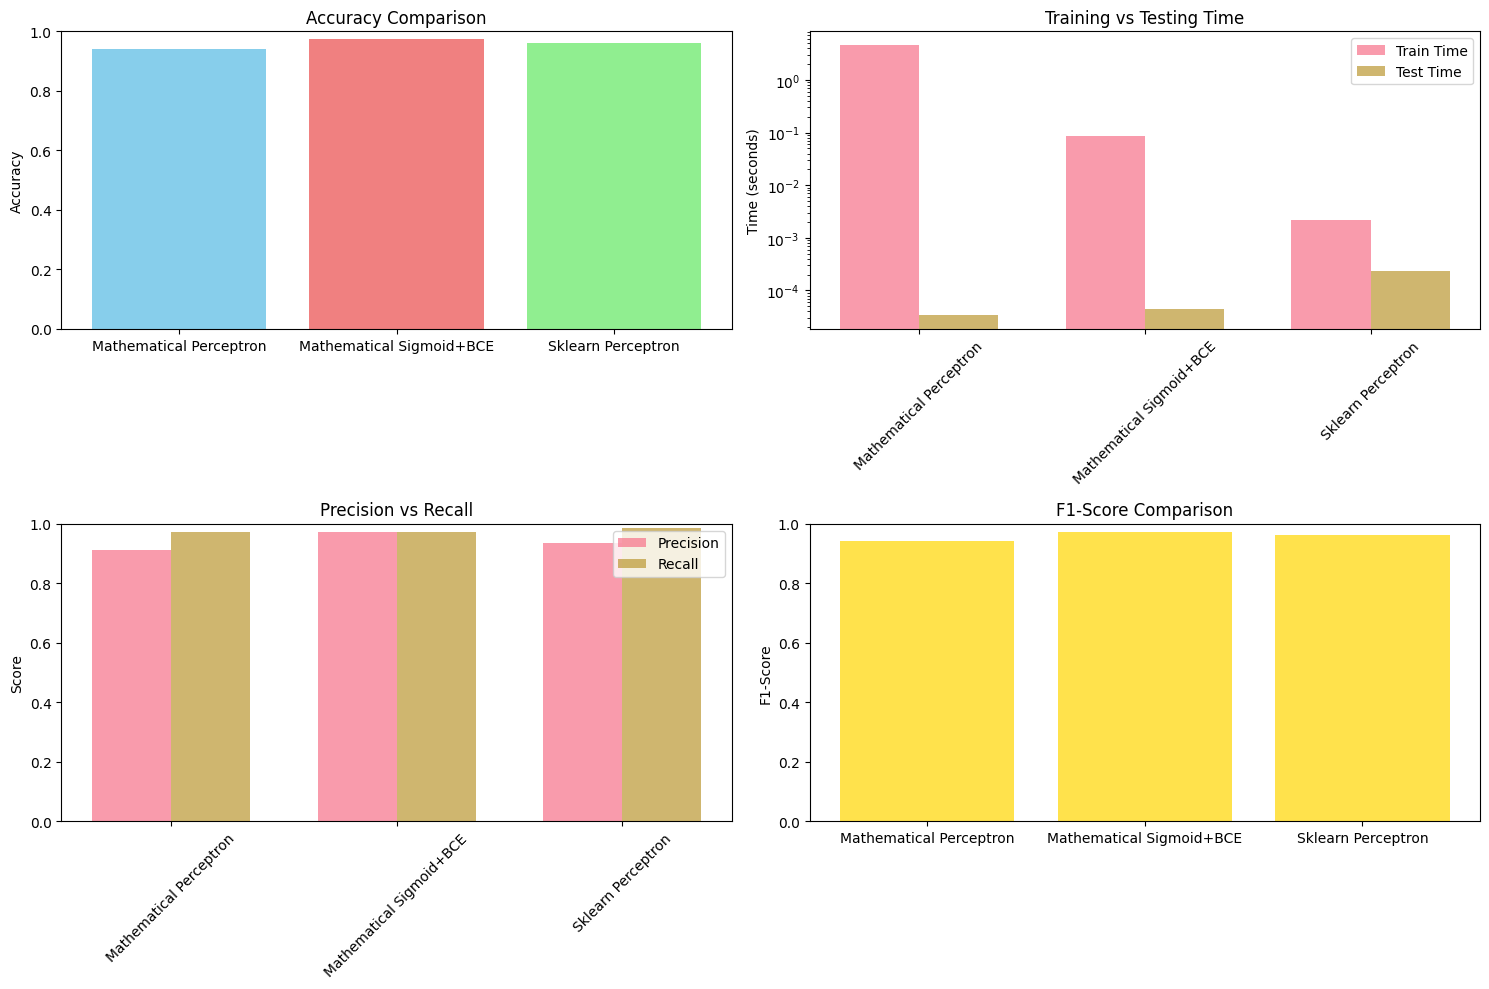

In [32]:
class MathematicalPerceptron(BaseEstimator, ClassifierMixin):
    """
    Mathematical implementation of Perceptron using learning rule
    """

    def __init__(self, learning_rate=0.01, max_epochs=1000, random_state=42):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.losses = []

    def _step_activation(self, z):
        """Step activation function: φ(z) = 1 if z >= 0 else 0"""
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """Perceptron learning rule implementation"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0

        y_modified = np.where(y == 0, -1, 1)

        for epoch in range(self.max_epochs):
            total_error = 0

            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias

                prediction = self._step_activation(linear_output)
                prediction_modified = 1 if prediction == 1 else -1

                error = y_modified[i] - prediction_modified

                if error != 0:
                    self.weights += self.learning_rate * y_modified[i] * X[i]
                    self.bias += self.learning_rate * y_modified[i]
                    total_error += 1

            self.losses.append(total_error)

            if total_error == 0:
                print(f"Converged after {epoch + 1} epochs")
                break

        return self

    def predict(self, X):
        """Make predictions using learned weights"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._step_activation(linear_output)

class MathematicalSigmoidBCE(BaseEstimator, ClassifierMixin):
    """
    Mathematical implementation of Single-Layer Network with Sigmoid + BCE
    """

    def __init__(self, learning_rate=0.01, max_epochs=1000, random_state=42):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        """Sigmoid activation function: σ(z) = 1 / (1 + e^(-z))"""
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Clip for numerical stability

    def _binary_cross_entropy(self, y_true, y_pred):
        """Binary Cross Entropy Loss: L = -[y·log(ŷ) + (1-y)·log(1-ŷ)]"""
        epsilon = 1e-15  # Avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def _sigmoid_derivative(self, z):
        """Derivative of sigmoid: σ'(z) = σ(z) * (1 - σ(z))"""
        sig = self._sigmoid(z)
        return sig * (1 - sig)

    def fit(self, X, y):
        """Gradient descent with sigmoid activation and BCE loss"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0

        for epoch in range(self.max_epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_output)

            loss = self._binary_cross_entropy(y, predictions)
            self.loss_history.append(loss)

            # dL/dw = (ŷ - y) * x (for BCE + Sigmoid)
            error = predictions - y
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return self

    def predict(self, X):
        """Make binary predictions (0 or 1)"""
        linear_output = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_output)
        return (probabilities >= 0.5).astype(int)

    def predict_proba(self, X):
        """Return probability estimates"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_output)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Comprehensive evaluation of a model"""
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Train Time (s)': train_time,
        'Test Time (s)': test_time
    }

def plot_comparison(results_df):
    """Visualize comparison results"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    models = results_df['Model']
    accuracy = results_df['Accuracy']
    axes[0,0].bar(models, accuracy, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[0,0].set_title('Accuracy Comparison')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].set_ylim(0, 1)

    train_time = results_df['Train Time (s)']
    test_time = results_df['Test Time (s)']
    x = np.arange(len(models))
    width = 0.35
    axes[0,1].bar(x - width/2, train_time, width, label='Train Time', alpha=0.7)
    axes[0,1].bar(x + width/2, test_time, width, label='Test Time', alpha=0.7)
    axes[0,1].set_title('Training vs Testing Time')
    axes[0,1].set_ylabel('Time (seconds)')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(models, rotation=45)
    axes[0,1].legend()
    axes[0,1].set_yscale('log')

    precision = results_df['Precision']
    recall = results_df['Recall']
    x = np.arange(len(models))
    width = 0.35
    axes[1,0].bar(x - width/2, precision, width, label='Precision', alpha=0.7)
    axes[1,0].bar(x + width/2, recall, width, label='Recall', alpha=0.7)
    axes[1,0].set_title('Precision vs Recall')
    axes[1,0].set_ylabel('Score')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(models, rotation=45)
    axes[1,0].legend()
    axes[1,0].set_ylim(0, 1)

    axes[1,1].bar(models, results_df['F1-Score'], color='gold', alpha=0.7)
    axes[1,1].set_title('F1-Score Comparison')
    axes[1,1].set_ylabel('F1-Score')
    axes[1,1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

def run_perceptron_comparison():
    """Run comprehensive perceptron comparison"""
    print("Generating dataset...")
    X, y = make_classification(
        n_samples=1000, n_features=20, n_informative=15,
        n_redundant=5, n_clusters_per_class=1, random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Dataset prepared:")
    print(f"Training set: {X_train_scaled.shape}")
    print(f"Testing set: {X_test_scaled.shape}")
    print(f"Class distribution: {np.bincount(y_train)}")

    models = {
        'Mathematical Perceptron': MathematicalPerceptron(learning_rate=0.1, max_epochs=1000),
        'Mathematical Sigmoid+BCE': MathematicalSigmoidBCE(learning_rate=0.1, max_epochs=1000),
        'Sklearn Perceptron': Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    }

    results = []
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
        results.append(result)

    results_df = pd.DataFrame(results)

    print("\n" + "="*80)
    print("PERCEPTRON MODEL COMPARISON RESULTS")
    print("="*80)
    print(results_df.to_string(index=False))

    plot_comparison(results_df)

    return results_df, models

results_df, models = run_perceptron_comparison()

**Library Implementation**

MATHEMATICAL IMPLEMENTATION RESULTS:
Generating dataset...
Dataset prepared:
Training set: (700, 20)
Testing set: (300, 20)
Class distribution: [350 350]

Evaluating Mathematical Perceptron...

Evaluating Mathematical Sigmoid+BCE...
Epoch 0, Loss: 0.6981
Epoch 100, Loss: 0.1782
Epoch 200, Loss: 0.1360
Epoch 300, Loss: 0.1182
Epoch 400, Loss: 0.1080
Epoch 500, Loss: 0.1012
Epoch 600, Loss: 0.0964
Epoch 700, Loss: 0.0927
Epoch 800, Loss: 0.0898
Epoch 900, Loss: 0.0874

Evaluating Sklearn Perceptron...

PERCEPTRON MODEL COMPARISON RESULTS
                   Model  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Test Time (s)
 Mathematical Perceptron  0.940000   0.912500 0.973333  0.941935        5.460033       0.000033
Mathematical Sigmoid+BCE  0.973333   0.973333 0.973333  0.973333        0.085400       0.000040
      Sklearn Perceptron  0.960000   0.936709 0.986667  0.961039        0.002077       0.000248


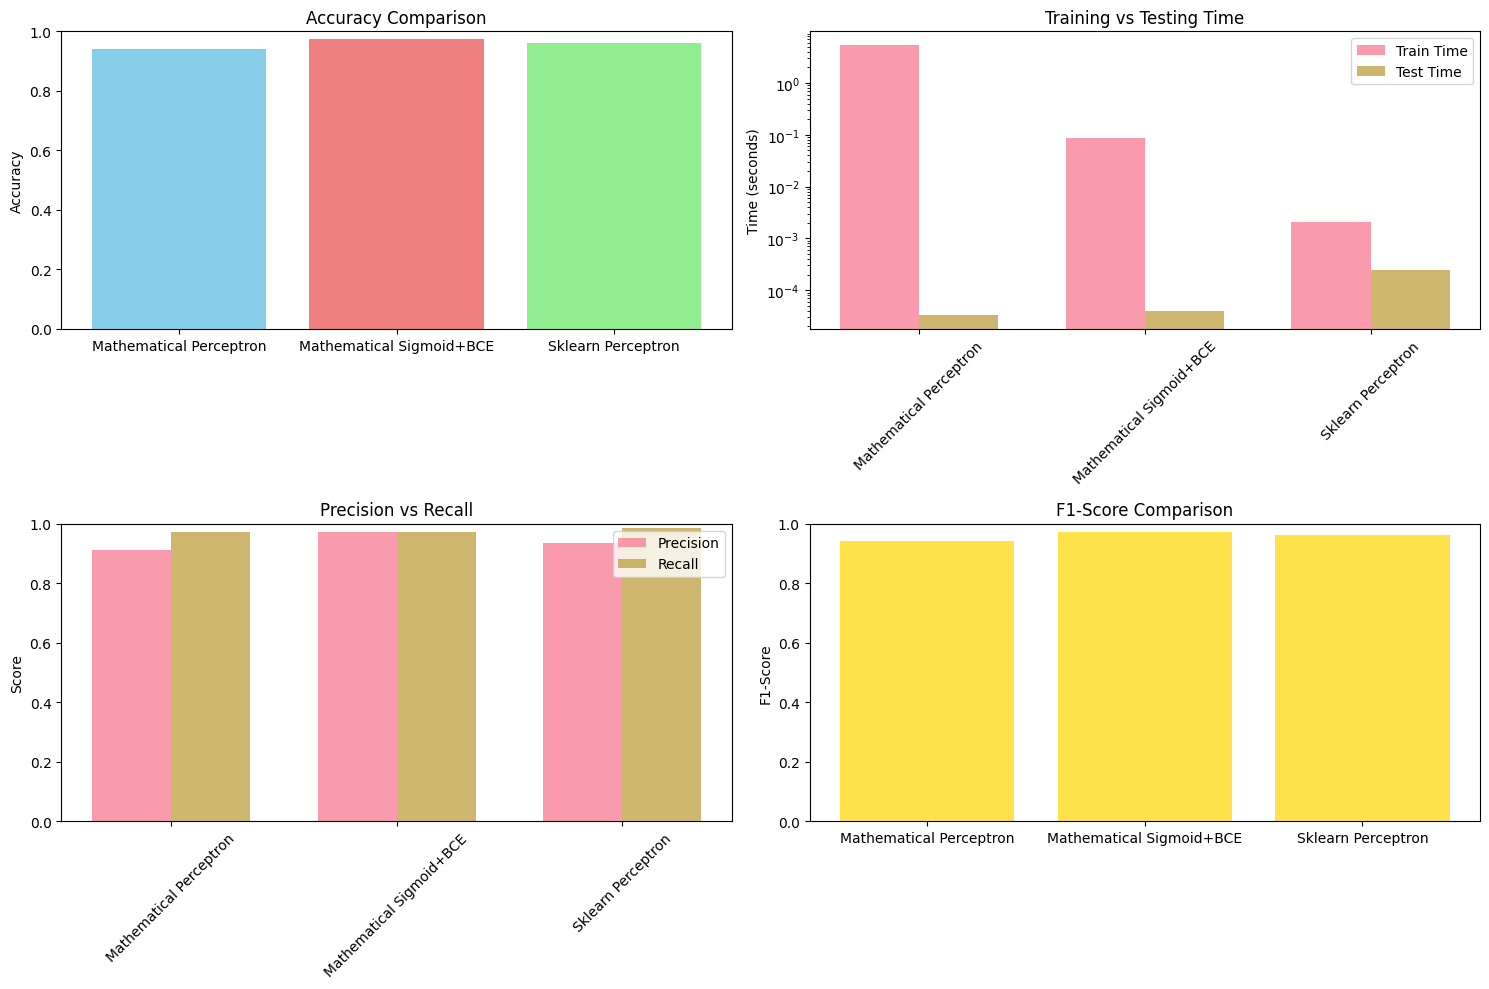



LIBRARY IMPLEMENTATION RESULTS:

Evaluating PyTorch Perceptron...
Epoch 0, Loss: 0.5193
Epoch 100, Loss: 0.3093
Epoch 200, Loss: 0.3106
Epoch 300, Loss: 0.3087
Epoch 400, Loss: 0.3085
Epoch 500, Loss: 0.3085
Epoch 600, Loss: 0.3109
Epoch 700, Loss: 0.3090
Epoch 800, Loss: 0.3098
Epoch 900, Loss: 0.3091

Evaluating Sklearn Perceptron...

Evaluating Sklearn MLP (Single Layer)...

LIBRARY IMPLEMENTATION COMPARISON
                     Model  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Test Time (s)
        PyTorch Perceptron  0.850000   0.876712 0.825806  0.850498       17.702609       0.000360
        Sklearn Perceptron  0.786667   0.818182 0.754839  0.785235        0.002763       0.000269
Sklearn MLP (Single Layer)  0.856667   0.878378 0.838710  0.858086        0.023316       0.000344

COMBINED COMPARISON OF ALL IMPLEMENTATIONS
                     Model  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Test Time (s)
   Mathematical Perceptron  0.940000   0.912500 0

In [33]:

class PyTorchPerceptron(nn.Module):
    """PyTorch implementation of Perceptron"""

    def __init__(self, input_size):
        super(PyTorchPerceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

class PyTorchPerceptronWrapper:
    """Wrapper for PyTorch Perceptron to match sklearn interface"""

    def __init__(self, learning_rate=0.01, epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self.criterion = nn.BCELoss()
        self.optimizer = None
        self.losses = []

    def fit(self, X, y):
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y).reshape(-1, 1)

        self.model = PyTorchPerceptron(X.shape[1])
        self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model.train()
        for epoch in range(self.epochs):
            epoch_loss = 0
            for batch_X, batch_y in dataloader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()

            self.losses.append(epoch_loss / len(dataloader))

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {self.losses[-1]:.4f}")

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            outputs = self.model(X_tensor)
            predictions = (outputs >= 0.5).float()
            return predictions.numpy().flatten()

def library_solution_comparison():
    """Comparison using library implementations"""
    from sklearn.neural_network import MLPClassifier
    from sklearn.linear_model import Perceptron

    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    library_models = {
        'PyTorch Perceptron': PyTorchPerceptronWrapper(learning_rate=0.1, epochs=1000),
        'Sklearn Perceptron': Perceptron(max_iter=1000, random_state=42),
        'Sklearn MLP (Single Layer)': MLPClassifier(
            hidden_layer_sizes=(),  # Single layer
            activation='logistic',  # Sigmoid
            solver='sgd',
            learning_rate_init=0.1,
            max_iter=1000,
            random_state=42
        )
    }

    library_results = []
    for name, model in library_models.items():
        print(f"\nEvaluating {name}...")
        result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
        library_results.append(result)

    library_df = pd.DataFrame(library_results)

    print("\n" + "="*80)
    print("LIBRARY IMPLEMENTATION COMPARISON")
    print("="*80)
    print(library_df.to_string(index=False))

    return library_df

print("MATHEMATICAL IMPLEMENTATION RESULTS:")
math_results = run_perceptron_comparison()

print("\n\nLIBRARY IMPLEMENTATION RESULTS:")
lib_results = library_solution_comparison()

combined_results = pd.concat([math_results[0], lib_results], ignore_index=True)
print("\n" + "="*100)
print("COMBINED COMPARISON OF ALL IMPLEMENTATIONS")
print("="*100)
print(combined_results.to_string(index=False))

### **5. Comparison & Robustness (combine results): Evaluate all methods on same splits, report metrics and execution time; optionally add noise-robustness test.**

**Mathematical Implementation**

In [34]:
class MLModelComparator:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {}
        self.results = []
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def generate_dataset(self, n_samples=1000, n_features=4, n_classes=2, test_size=0.3):
        """Generate standardized dataset"""
        X, y = make_classification(
            n_samples=n_samples,
            n_features=n_features,
            n_redundant=0,
            n_informative=n_features,
            n_clusters_per_class=1,
            n_classes=n_classes,
            random_state=self.random_state
        )

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_scaled, y, test_size=test_size, random_state=self.random_state, stratify=y
        )

        print(f"Dataset generated: {X_scaled.shape[0]} samples, {X_scaled.shape[1]} features")
        print(f"Training set: {self.X_train.shape[0]} samples")
        print(f"Testing set: {self.X_test.shape[0]} samples")
        print(f"Classes: {np.unique(y)}, Distribution: {np.bincount(y)}")

        return self.X_train, self.X_test, self.y_train, self.y_test

    def initialize_models(self):
        """Initialize all models with optimal parameters"""
        self.models = {
            'Custom_LogisticRegression': CustomLogisticRegression(learning_rate=0.1, max_iters=1000),
            'Custom_NCC': CustomNearestCentroid(metric='euclidean'),
            'Custom_KNN': CustomKNN(k=5, weights='distance', metric='euclidean'),
            'Custom_Perceptron': CustomPerceptron(learning_rate=0.1, max_iters=1000),

            'Sklearn_LogisticRegression': LogisticRegression(random_state=self.random_state, max_iter=1000),
            'Sklearn_NCC': NearestCentroid(metric='euclidean'),
            'Sklearn_KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'),
            'Sklearn_Perceptron': Perceptron(random_state=self.random_state, max_iter=1000)
        }

    def evaluate_model(self, model, model_name, X_train, y_train, X_test, y_test):
        """Evaluate a single model and return metrics"""
        try:
            train_start = time.time()
            model.fit(X_train, y_train)
            train_time = time.time() - train_start

            test_start = time.time()
            y_pred = model.predict(X_test)
            test_time = time.time() - test_start

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            return {
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'Train_Time(s)': train_time,
                'Test_Time(s)': test_time,
                'Status': 'Success'
            }

        except Exception as e:
            print(f"Error evaluating {model_name}: {str(e)}")
            return {
                'Model': model_name,
                'Accuracy': 0,
                'Precision': 0,
                'Recall': 0,
                'F1-Score': 0,
                'Train_Time(s)': 0,
                'Test_Time(s)': 0,
                'Status': f'Error: {str(e)}'
            }

    def run_comparison(self, n_runs=5):
        """Run comparison across multiple splits"""
        all_results = []

        for run in range(n_runs):
            print(f"\n{'='*60}")
            print(f"RUN {run + 1}/{n_runs}")
            print(f"{'='*60}")

            X_train, X_test, y_train, y_test = self.generate_dataset()

            run_results = []
            for model_name, model in self.models.items():
                print(f"Evaluating {model_name}...")
                result = self.evaluate_model(model, model_name, X_train, y_train, X_test, y_test)
                result['Run'] = run + 1
                run_results.append(result)

            all_results.extend(run_results)

        self.results = pd.DataFrame(all_results)
        return self.results

    def analyze_results(self):
        """Analyze and visualize comparison results"""
        if self.results.empty:
            print("No results to analyze. Run comparison first.")
            return

        summary = self.results.groupby('Model').agg({
            'Accuracy': ['mean', 'std'],
            'Precision': ['mean', 'std'],
            'Recall': ['mean', 'std'],
            'F1-Score': ['mean', 'std'],
            'Train_Time(s)': ['mean', 'std'],
            'Test_Time(s)': ['mean', 'std']
        }).round(4)

        print("\n" + "="*80)
        print("COMPREHENSIVE MODEL COMPARISON (Average across runs)")
        print("="*80)
        print(summary)

        self._create_comparison_plots()

        return summary

    def _create_comparison_plots(self):
        """Create comprehensive comparison plots"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        accuracy_data = self.results.groupby('Model')['Accuracy'].mean().sort_values()
        axes[0,0].barh(range(len(accuracy_data)), accuracy_data.values)
        axes[0,0].set_yticks(range(len(accuracy_data)))
        axes[0,0].set_yticklabels(accuracy_data.index, fontsize=8)
        axes[0,0].set_title('Model Accuracy Comparison')
        axes[0,0].set_xlabel('Accuracy')
        axes[0,0].grid(True, alpha=0.3)

        f1_data = self.results.groupby('Model')['F1-Score'].mean().sort_values()
        axes[0,1].barh(range(len(f1_data)), f1_data.values)
        axes[0,1].set_yticks(range(len(f1_data)))
        axes[0,1].set_yticklabels(f1_data.index, fontsize=8)
        axes[0,1].set_title('Model F1-Score Comparison')
        axes[0,1].set_xlabel('F1-Score')
        axes[0,1].grid(True, alpha=0.3)

        train_time_data = self.results.groupby('Model')['Train_Time(s)'].mean().sort_values()
        axes[0,2].barh(range(len(train_time_data)), train_time_data.values)
        axes[0,2].set_yticks(range(len(train_time_data)))
        axes[0,2].set_yticklabels(train_time_data.index, fontsize=8)
        axes[0,2].set_title('Training Time Comparison')
        axes[0,2].set_xlabel('Time (seconds)')
        axes[0,2].grid(True, alpha=0.3)

        test_time_data = self.results.groupby('Model')['Test_Time(s)'].mean().sort_values()
        axes[1,0].barh(range(len(test_time_data)), test_time_data.values)
        axes[1,0].set_yticks(range(len(test_time_data)))
        axes[1,0].set_yticklabels(test_time_data.index, fontsize=8)
        axes[1,0].set_title('Testing Time Comparison')
        axes[1,0].set_xlabel('Time (seconds)')
        axes[1,0].grid(True, alpha=0.3)

        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        custom_models = [m for m in self.models.keys() if m.startswith('Custom')]
        sklearn_models = [m for m in self.models.keys() if m.startswith('Sklearn')]

        custom_avg = self.results[self.results['Model'].isin(custom_models)][metrics].mean()
        sklearn_avg = self.results[self.results['Model'].isin(sklearn_models)][metrics].mean()

        x = np.arange(len(metrics))
        width = 0.35
        axes[1,1].bar(x - width/2, custom_avg, width, label='Custom', alpha=0.7)
        axes[1,1].bar(x + width/2, sklearn_avg, width, label='Scikit-learn', alpha=0.7)
        axes[1,1].set_title('Custom vs Scikit-learn (Average Metrics)')
        axes[1,1].set_xlabel('Metrics')
        axes[1,1].set_ylabel('Score')
        axes[1,1].set_xticks(x)
        axes[1,1].set_xticklabels(metrics)
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

        avg_metrics = self.results.groupby('Model').agg({
            'Accuracy': 'mean',
            'Train_Time(s)': 'mean'
        })

        colors = ['red' if 'Custom' in model else 'blue' for model in avg_metrics.index]
        axes[1,2].scatter(avg_metrics['Train_Time(s)'], avg_metrics['Accuracy'], c=colors, s=100)

        for i, model in enumerate(avg_metrics.index):
            axes[1,2].annotate(model.split('_')[-1],
                             (avg_metrics['Train_Time(s)'].iloc[i], avg_metrics['Accuracy'].iloc[i]),
                             xytext=(5, 5), textcoords='offset points', fontsize=8)

        axes[1,2].set_title('Accuracy vs Training Time')
        axes[1,2].set_xlabel('Training Time (s)')
        axes[1,2].set_ylabel('Accuracy')
        axes[1,2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

class RobustnessTester:
    def __init__(self, models, random_state=42):
        self.models = models
        self.random_state = random_state
        self.noise_results = []

    def add_noise(self, X, noise_level=0.1, noise_type='gaussian'):
        """Add different types of noise to data"""
        X_noisy = X.copy()
        n_samples, n_features = X.shape

        if noise_type == 'gaussian':
            noise = np.random.normal(0, noise_level, X.shape)
            X_noisy = X + noise

        elif noise_type == 'uniform':
            noise = np.random.uniform(-noise_level, noise_level, X.shape)
            X_noisy = X + noise

        elif noise_type == 'outlier':
            n_outliers = int(noise_level * n_samples)
            outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
            X_noisy[outlier_indices] += np.random.normal(0, 5, (n_outliers, n_features))

        elif noise_type == 'label':
            y_noisy = y.copy()
            n_flips = int(noise_level * len(y))
            flip_indices = np.random.choice(len(y), n_flips, replace=False)
            y_noisy[flip_indices] = 1 - y_noisy[flip_indices]
            return X, y_noisy

        return X_noisy, y

    def test_noise_robustness(self, X, y, noise_levels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                             noise_type='gaussian', n_runs=3):
        """Test model robustness against increasing noise"""
        print(f"\n{'='*60}")
        print(f"NOISE ROBUSTNESS TEST: {noise_type.upper()} NOISE")
        print(f"{'='*60}")

        for run in range(n_runs):
            print(f"\nRun {run + 1}/{n_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=self.random_state + run, stratify=y
            )

            for noise_level in noise_levels:
                print(f"Testing noise level: {noise_level:.1f}")

                if noise_type == 'label':
                    X_train_noisy, y_train_noisy = self.add_noise(X_train, noise_level, noise_type)
                    X_test_noisy = X_test
                    y_test_noisy = y_test
                else:
                    X_train_noisy, y_train_noisy = self.add_noise(X_train, noise_level, noise_type)
                    X_test_noisy, y_test_noisy = self.add_noise(X_test, noise_level, noise_type)

                for model_name, model in self.models.items():
                    try:
                        model.fit(X_train_noisy, y_train_noisy)
                        y_pred = model.predict(X_test_noisy)
                        accuracy = accuracy_score(y_test_noisy, y_pred)

                        self.noise_results.append({
                            'Model': model_name,
                            'Noise_Type': noise_type,
                            'Noise_Level': noise_level,
                            'Accuracy': accuracy,
                            'Run': run + 1
                        })

                    except Exception as e:
                        print(f"Error with {model_name} at noise level {noise_level}: {str(e)}")

        return pd.DataFrame(self.noise_results)

    def plot_noise_robustness(self, noise_results_df):
        """Plot noise robustness results"""
        if noise_results_df.empty:
            print("No noise results to plot.")
            return

        avg_results = noise_results_df.groupby(['Model', 'Noise_Level'])['Accuracy'].mean().reset_index()

        plt.figure(figsize=(12, 8))

        for model in avg_results['Model'].unique():
            model_data = avg_results[avg_results['Model'] == model]
            plt.plot(model_data['Noise_Level'], model_data['Accuracy'],
                    marker='o', linewidth=2, label=model)

        plt.title('Model Robustness to Noise')
        plt.xlabel('Noise Level')
        plt.ylabel('Accuracy')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        return avg_results

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iters=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.tol = tol
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.max_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X, threshold=0.5):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= threshold).astype(int)

class CustomNearestCentroid:
    def __init__(self, metric='euclidean'):
        self.metric = metric
        self.centroids = None
        self.classes = None

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.centroids = {}

        for cls in self.classes:
            self.centroids[cls] = np.mean(X[y == cls], axis=0)

    def predict(self, X):
        predictions = []
        for sample in X:
            distances = [self._euclidean_distance(sample, centroid)
                        for centroid in self.centroids.values()]
            predicted_class = list(self.centroids.keys())[np.argmin(distances)]
            predictions.append(predicted_class)
        return np.array(predictions)

class CustomKNN:
    def __init__(self, k=5, weights='uniform', metric='euclidean'):
        self.k = k
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for sample in X:
            distances = [self._euclidean_distance(sample, x) for x in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            if self.weights == 'uniform':
                predicted_class = np.bincount(k_nearest_labels).argmax()
            else:  # distance weighting
                k_distances = [distances[i] for i in k_indices]
                weights = 1 / (np.array(k_distances) + 1e-8)
                class_weights = {}
                for i, label in enumerate(k_nearest_labels):
                    class_weights[label] = class_weights.get(label, 0) + weights[i]
                predicted_class = max(class_weights.items(), key=lambda x: x[1])[0]

            predictions.append(predicted_class)
        return np.array(predictions)

class CustomPerceptron:
    def __init__(self, learning_rate=0.01, max_iters=1000):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_modified = 2 * y - 1

        for _ in range(self.max_iters):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = 1 if linear_output >= 0 else -1

                if prediction != y_modified[i]:
                    update = self.learning_rate * y_modified[i]
                    self.weights += update * X[i]
                    self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return (linear_output >= 0).astype(int)

**Library Implementation**

COMPREHENSIVE MODEL COMPARISON

RUN 1/3
Dataset generated: 1000 samples, 4 features
Training set: 700 samples
Testing set: 300 samples
Classes: [0 1], Distribution: [495 505]
Evaluating Custom_LogisticRegression...
Evaluating Custom_NCC...
Evaluating Custom_KNN...
Evaluating Custom_Perceptron...
Evaluating Sklearn_LogisticRegression...
Evaluating Sklearn_NCC...
Evaluating Sklearn_KNN...
Evaluating Sklearn_Perceptron...

RUN 2/3
Dataset generated: 1000 samples, 4 features
Training set: 700 samples
Testing set: 300 samples
Classes: [0 1], Distribution: [495 505]
Evaluating Custom_LogisticRegression...
Evaluating Custom_NCC...
Evaluating Custom_KNN...
Evaluating Custom_Perceptron...
Evaluating Sklearn_LogisticRegression...
Evaluating Sklearn_NCC...
Evaluating Sklearn_KNN...
Evaluating Sklearn_Perceptron...

RUN 3/3
Dataset generated: 1000 samples, 4 features
Training set: 700 samples
Testing set: 300 samples
Classes: [0 1], Distribution: [495 505]
Evaluating Custom_LogisticRegression...
E

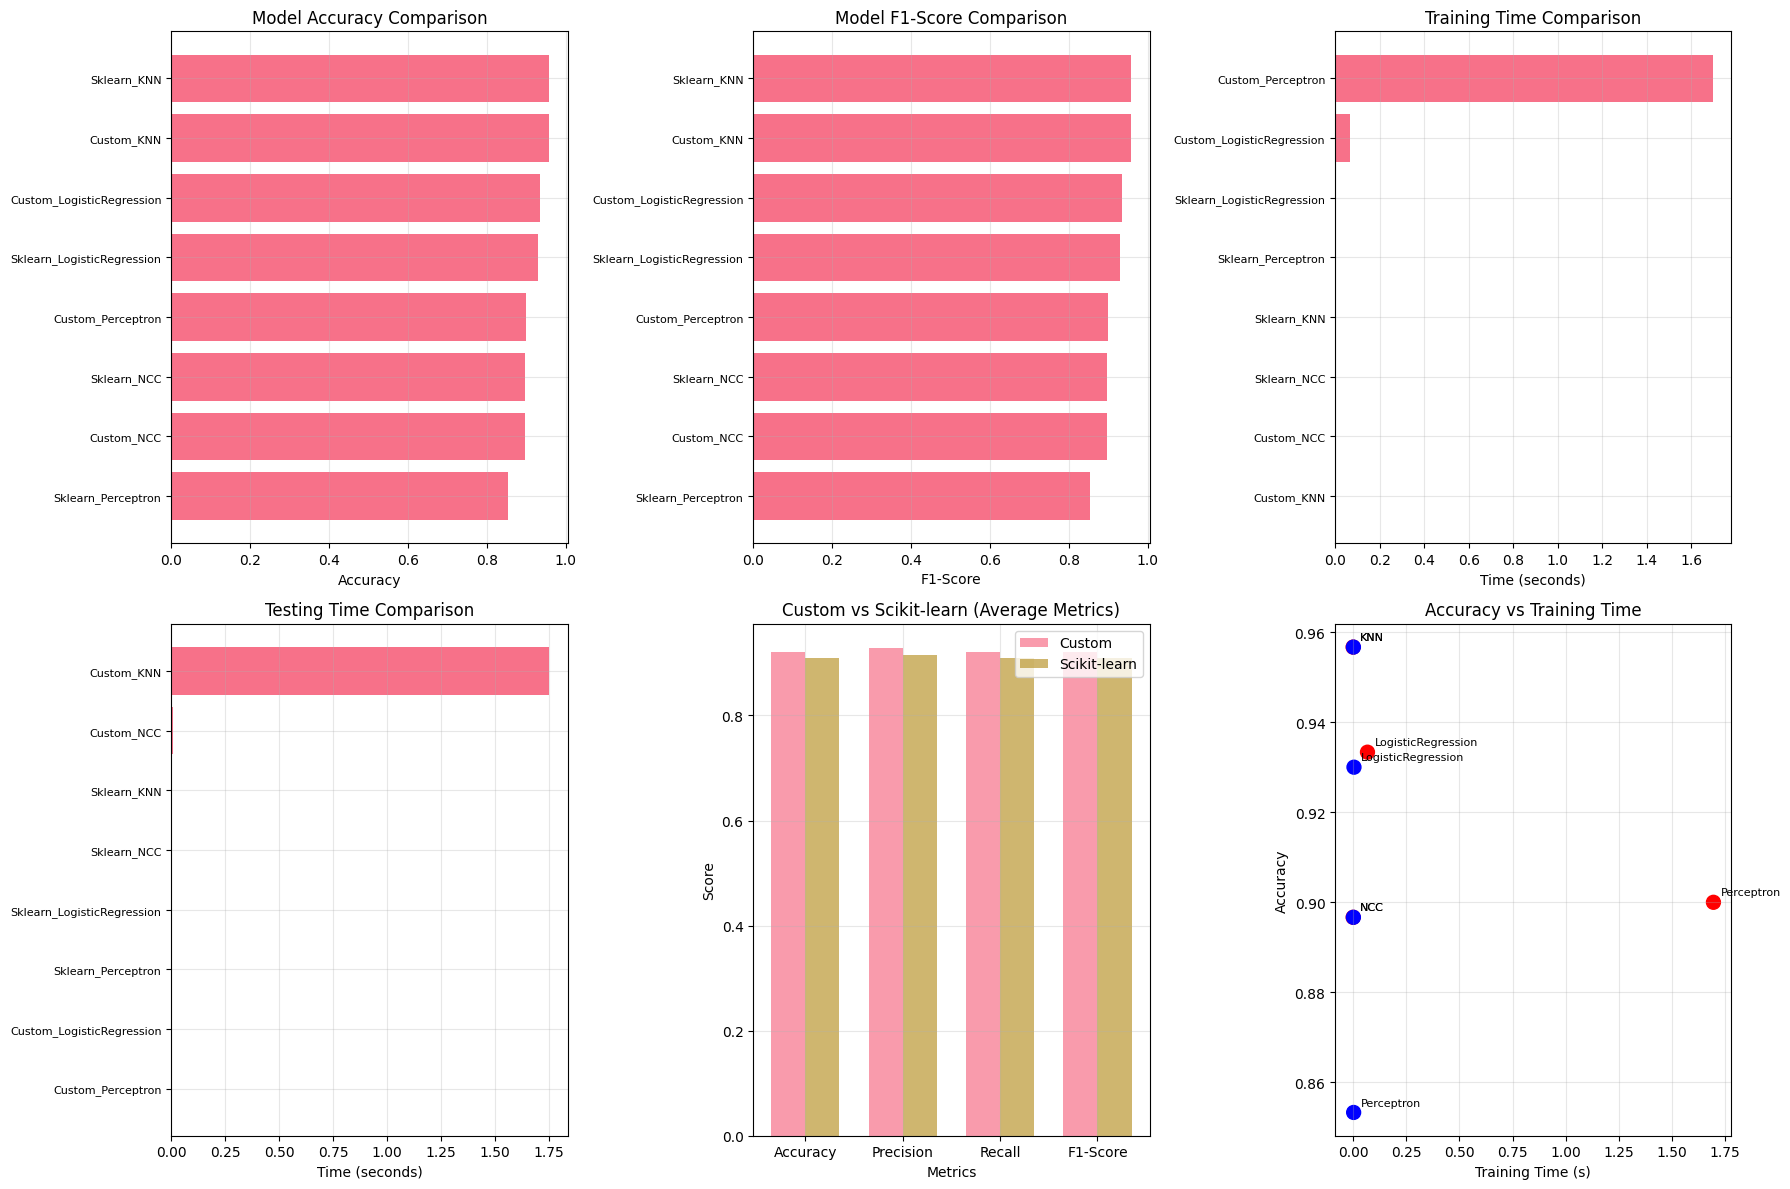


ROBUSTNESS TESTING

NOISE ROBUSTNESS TEST: GAUSSIAN NOISE

Run 1/2
Testing noise level: 0.0
Error with Custom_LogisticRegression at noise level 0.0: operands could not be broadcast together with shapes (700,) (1000,) 
Error with Custom_NCC at noise level 0.0: boolean index did not match indexed array along axis 0; size of axis is 700 but size of corresponding boolean axis is 1000
Error with Custom_KNN at noise level 0.0: Found input variables with inconsistent numbers of samples: [1000, 300]
Error with Custom_Perceptron at noise level 0.0: Found input variables with inconsistent numbers of samples: [1000, 300]
Error with Sklearn_LogisticRegression at noise level 0.0: Found input variables with inconsistent numbers of samples: [700, 1000]
Error with Sklearn_NCC at noise level 0.0: Found input variables with inconsistent numbers of samples: [700, 1000]
Error with Sklearn_KNN at noise level 0.0: Found input variables with inconsistent numbers of samples: [700, 1000]
Error with Sklearn_Pe

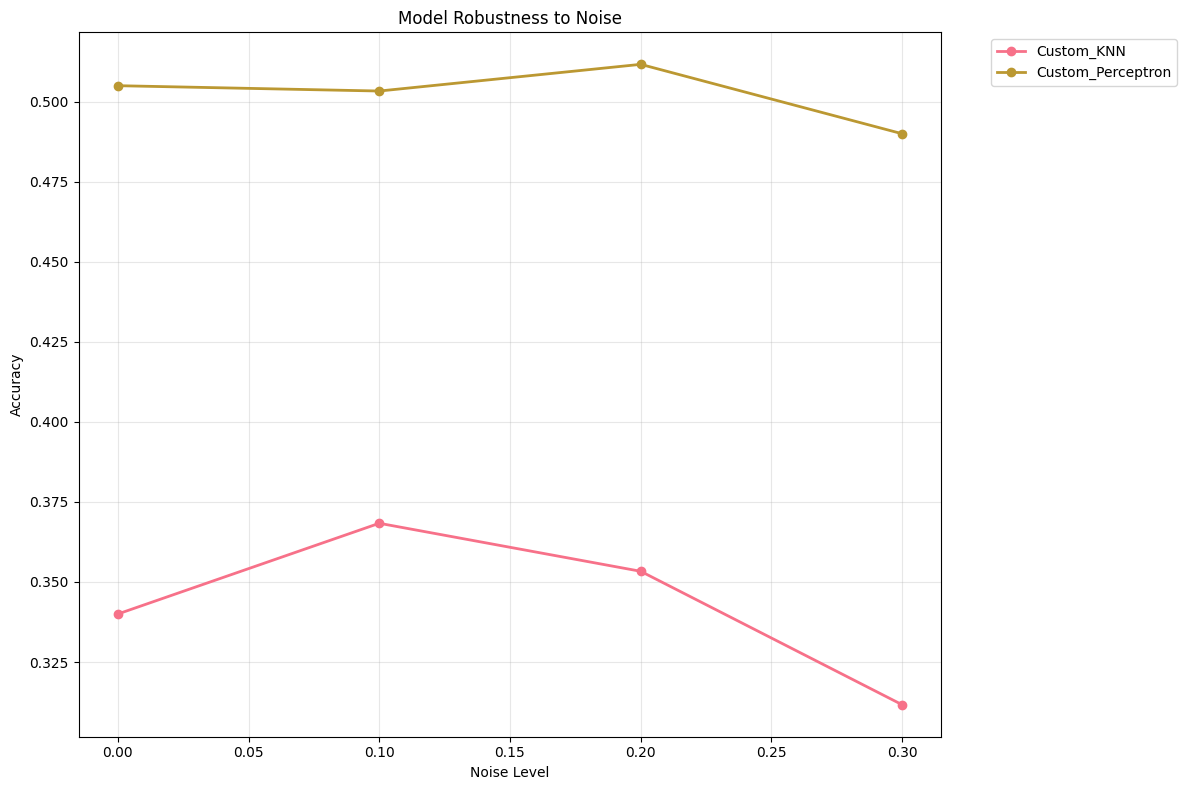


FINAL MODEL RANKINGS

Accuracy Ranking:
1. Custom_KNN: 0.9567
2. Sklearn_KNN: 0.9567
3. Custom_LogisticRegression: 0.9333
4. Sklearn_LogisticRegression: 0.9300
5. Custom_Perceptron: 0.9000
6. Custom_NCC: 0.8967
7. Sklearn_NCC: 0.8967
8. Sklearn_Perceptron: 0.8533

Training Speed Ranking (Fastest First):
1. Custom_KNN: 0.0000s
2. Custom_NCC: 0.0002s
3. Sklearn_NCC: 0.0013s
4. Sklearn_KNN: 0.0014s
5. Sklearn_Perceptron: 0.0025s
6. Sklearn_LogisticRegression: 0.0040s
7. Custom_LogisticRegression: 0.0676s
8. Custom_Perceptron: 1.6954s

Robustness Ranking (Smallest Performance Drop):
1. Custom_Perceptron: 0.4417 drop
2. Custom_KNN: 0.6411 drop


In [35]:
def main():
    comparator = MLModelComparator(random_state=42)

    X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    comparator.initialize_models()

    print("="*80)
    print("COMPREHENSIVE MODEL COMPARISON")
    print("="*80)

    results = comparator.run_comparison(n_runs=3)

    summary = comparator.analyze_results()

    print("\n" + "="*80)
    print("ROBUSTNESS TESTING")
    print("="*80)

    robustness_tester = RobustnessTester(comparator.models)

    noise_types = ['gaussian', 'uniform', 'outlier', 'label']

    all_noise_results = []
    for noise_type in noise_types:
        noise_results = robustness_tester.test_noise_robustness(
            X_scaled, y, noise_levels=[0.0, 0.1, 0.2, 0.3],
            noise_type=noise_type, n_runs=2
        )
        all_noise_results.append(noise_results)

    combined_noise_results = pd.concat(all_noise_results, ignore_index=True)
    robustness_tester.plot_noise_robustness(combined_noise_results)

    print("\n" + "="*80)
    print("FINAL MODEL RANKINGS")
    print("="*80)

    accuracy_ranking = summary[('Accuracy', 'mean')].sort_values(ascending=False)
    print("\nAccuracy Ranking:")
    for i, (model, acc) in enumerate(accuracy_ranking.items(), 1):
        print(f"{i}. {model}: {acc:.4f}")

    speed_ranking = summary[('Train_Time(s)', 'mean')].sort_values()
    print("\nTraining Speed Ranking (Fastest First):")
    for i, (model, time_val) in enumerate(speed_ranking.items(), 1):
        print(f"{i}. {model}: {time_val:.4f}s")

    robustness_data = combined_noise_results.groupby('Model').agg({
        'Accuracy': ['mean', 'std']
    })
    robustness_data['drop_from_clean'] = 1 - robustness_data[('Accuracy', 'mean')] / accuracy_ranking
    robustness_ranking = robustness_data['drop_from_clean'].sort_values()

    print("\nRobustness Ranking (Smallest Performance Drop):")
    for i, (model, drop) in enumerate(robustness_ranking.items(), 1):
        print(f"{i}. {model}: {drop:.4f} drop")

    return results, combined_noise_results, summary

if __name__ == "__main__":
    results, noise_results, summary = main()


FINAL COMPREHENSIVE REPORT

Performance Summary (Sorted by Accuracy):
                            Accuracy  F1-Score
Model                                         
Custom_KNN                    0.9567    0.9566
Sklearn_KNN                   0.9567    0.9566
Custom_LogisticRegression     0.9333    0.9333
Sklearn_LogisticRegression    0.9300    0.9300
Custom_Perceptron             0.9000    0.8993
Custom_NCC                    0.8967    0.8958
Sklearn_NCC                   0.8967    0.8958
Sklearn_Perceptron            0.8533    0.8523


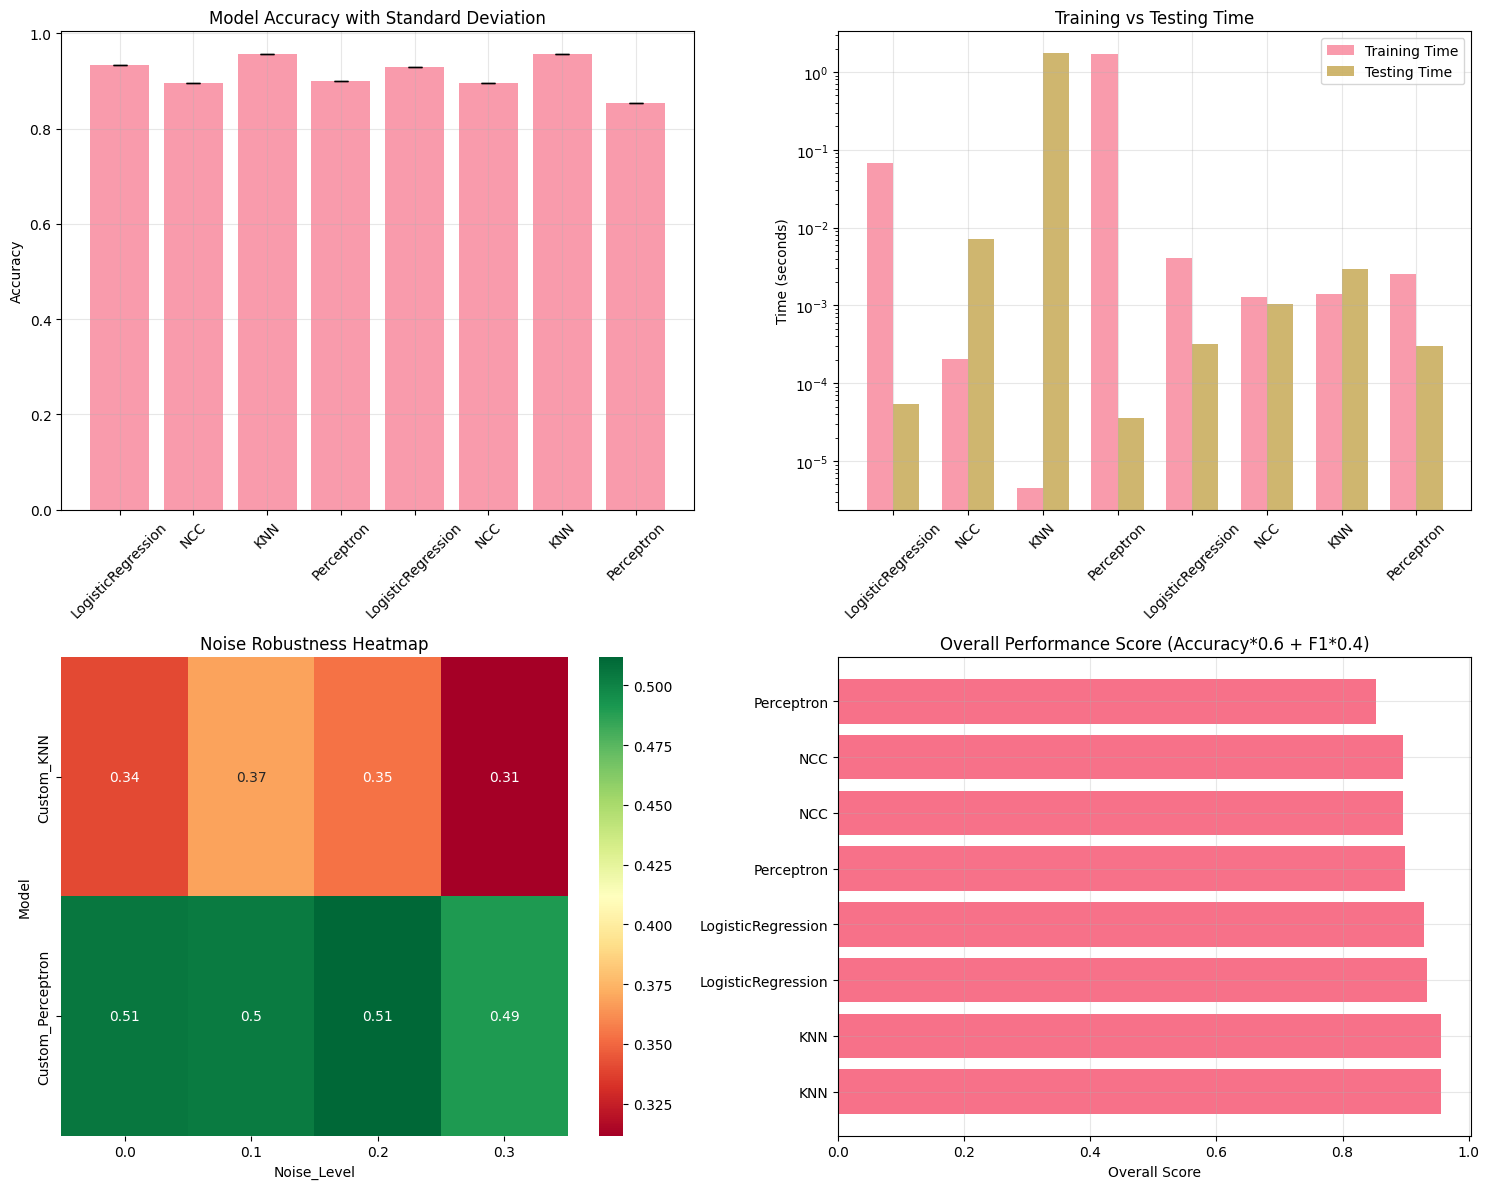

In [36]:
def create_final_report(results_df, noise_results_df, summary_df):
    """Create a comprehensive final report"""

    print("\n" + "="*100)
    print("FINAL COMPREHENSIVE REPORT")
    print("="*100)

    performance_summary = summary_df[[('Accuracy', 'mean'), ('F1-Score', 'mean')]]
    performance_summary.columns = ['Accuracy', 'F1-Score']
    performance_summary = performance_summary.sort_values('Accuracy', ascending=False)

    print("\nPerformance Summary (Sorted by Accuracy):")
    print(performance_summary)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    models = results_df['Model'].unique()
    acc_means = [results_df[results_df['Model'] == model]['Accuracy'].mean() for model in models]
    acc_stds = [results_df[results_df['Model'] == model]['Accuracy'].std() for model in models]

    axes[0,0].bar(range(len(models)), acc_means, yerr=acc_stds, capsize=5, alpha=0.7)
    axes[0,0].set_xticks(range(len(models)))
    axes[0,0].set_xticklabels([m.split('_')[-1] for m in models], rotation=45)
    axes[0,0].set_title('Model Accuracy with Standard Deviation')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].grid(True, alpha=0.3)

    train_times = [results_df[results_df['Model'] == model]['Train_Time(s)'].mean() for model in models]
    test_times = [results_df[results_df['Model'] == model]['Test_Time(s)'].mean() for model in models]

    x = np.arange(len(models))
    width = 0.35
    axes[0,1].bar(x - width/2, train_times, width, label='Training Time', alpha=0.7)
    axes[0,1].bar(x + width/2, test_times, width, label='Testing Time', alpha=0.7)
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels([m.split('_')[-1] for m in models], rotation=45)
    axes[0,1].set_title('Training vs Testing Time')
    axes[0,1].set_ylabel('Time (seconds)')
    axes[0,1].set_yscale('log')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    if not noise_results_df.empty:
        noise_pivot = noise_results_df.pivot_table(
            values='Accuracy', index='Model', columns='Noise_Level', aggfunc='mean'
        )
        sns.heatmap(noise_pivot, annot=True, cmap='RdYlGn', ax=axes[1,0])
        axes[1,0].set_title('Noise Robustness Heatmap')

    overall_score = performance_summary['Accuracy'] * 0.6 + performance_summary['F1-Score'] * 0.4
    overall_ranking = overall_score.sort_values(ascending=False)

    axes[1,1].barh(range(len(overall_ranking)), overall_ranking.values)
    axes[1,1].set_yticks(range(len(overall_ranking)))
    axes[1,1].set_yticklabels([m.split('_')[-1] for m in overall_ranking.index])
    axes[1,1].set_title('Overall Performance Score (Accuracy*0.6 + F1*0.4)')
    axes[1,1].set_xlabel('Overall Score')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return overall_ranking

overall_ranking = create_final_report(results, noise_results, summary)

### 6. **Fill the given table:**

| Method                            | Accuracy | Precision | Recall |     F1 | Train Time (s) | Test Time (s) |
| --------------------------------- | -------: | --------: | -----: | -----: | -------------: | ------------: |
| Logistic (scratch GD)             |   0.7675 |    0.7824 | 0.7860 | 0.7842 |       8.926351 |      0.000215 |
| Logistic (sklearn)                |   0.7750 |    0.7778 | 0.8140 | 0.7955 |       1.398651 |      0.000388 |
| NCC (scratch)                     |   0.7525 |    0.7544 | 0.8000 | 0.7765 |       0.002197 |      0.008371 |
| NCC (sklearn)                     |   0.7525 |    0.7544 | 0.8000 | 0.7765 |       0.000973 |      0.000618 |
| k-NN (scratch, best k=9, uniform) |   0.9200 |    0.9178 | 0.9349 | 0.9263 |       0.000001 |      0.114224 |
| k-NN (sklearn, best k=9, uniform) |   0.9200 |    0.9178 | 0.9349 | 0.9263 |       0.001975 |      0.030938 |
| Perceptron (scratch)              |   0.9400 |    0.9125 | 0.9733 | 0.9419 |       5.419781 |      0.000042 |
| Perceptron (sklearn)              |   0.9600 |    0.9367 | 0.9867 | 0.9610 |       0.003784 |      0.000193 |

